# 앙상블
- 여러개의 분류모델을 조합해서 더 나은 성능을 내는 방법

## RandomForest
: 의사결정트리 bigging(단일 모델 조합)해서 예측을 실행하는 모델

In [23]:
from sklearn import datasets

import numpy as np
np.random.seed(5)

In [24]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, label = mnist.data, mnist.target

In [25]:
# 의사결정나무를 이용한 교차 검증 10번 실시
from sklearn import tree
from sklearn.model_selection import cross_val_score
cf =tree.DecisionTreeClassifier()


cv_scores = cross_val_score(cf,features, label, cv =10)
cv_scores

array([0.79444444, 0.82222222, 0.84444444, 0.81111111, 0.76666667,
       0.88888889, 0.91111111, 0.81564246, 0.82122905, 0.80446927])

In [26]:
for i in range(10):
    cv_scores = cross_val_score(cf,features, label, cv =10, scoring='accuracy')
    print(cv_scores.mean())

0.8235630043451273
0.8224674115456239
0.8235692116697703
0.8341464928615766
0.8185692116697704
0.8241247672253259
0.8180136561142148
0.8235630043451272
0.8258038485412786
0.8296958410924891


In [27]:
# RandomForest를 이용한 교차검증 10번 - 쌤 ver
from sklearn.ensemble import RandomForestClassifier

cv_scores=[]
for i in range(10):
    scores =cross_val_score(
        RandomForestClassifier(),
        features,
        label,
        cv =10,
        scoring='accuracy'
    )
    cv_scores.append(scores.mean())
cv_scores


[0.9510180012414648,
 0.9471291123525759,
 0.9460242085661079,
 0.9554810676598386,
 0.9476939788950961,
 0.9449006828057106,
 0.952129112352576,
 0.9499162011173183,
 0.9454500310366232,
 0.9449068901303537]

In [28]:
def cross_vaildation(classifier,features, label):
    cv_scores=[]
    for i in range(10):
        scores =cross_val_score(
            classifier,
            features,
            label,
            cv =10,
            scoring='accuracy'
        )
        cv_scores.append(scores.mean())

    return cv_scores
 

In [38]:
# 의사결정 나무
dt_cv_scores = cross_vaildation(tree.DecisionTreeClassifier() ,features ,label )
dt_cv_scores

[0.8308317815021725,
 0.8258069522036002,
 0.8257945375543141,
 0.8163407821229051,
 0.8363500931098697,
 0.8313718187461203,
 0.8263500931098695,
 0.8341495965238982,
 0.8297051520794538,
 0.820782122905028]

In [39]:
# RandomForest
rf_cv_scores = cross_vaildation(RandomForestClassifier() ,features ,label )
rf_cv_scores

[0.9493575418994412,
 0.9471291123525759,
 0.9493606455617629,
 0.9487988826815641,
 0.9510180012414648,
 0.9526939788950962,
 0.94768156424581,
 0.9515673494723773,
 0.9510180012414648,
 0.9471322160148976]

---
### 랜덤포레스트와 의사결정나무의 정확도의 시각화

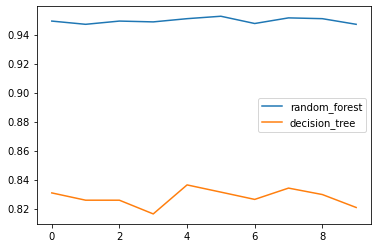

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
cv_list = {'random_forest': rf_cv_scores, 'decision_tree':dt_cv_scores}
df = pd.DataFrame(cv_list)
df.plot()
plt.show()

---
# 보팅(voting) 앙상블
: 단일 모델을 앙상블하여 더 나은 예측을 하는 모델 생성

### 단일모델 정확도 측정


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(features, label, test_size=0.2)

In [32]:
# 의사결정 나무
dtree = tree.DecisionTreeClassifier()
dtree =dtree.fit(X_train,y_train)
dtree_score = dtree.score(X_test, y_test)
print('d-tree :', dtree_score)

d-tree: 0.8527777777777777


In [34]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
knn_score = knn.score(X_test, y_test)
print('Knn :', knn_score)

Knn : 0.9888888888888889


In [41]:
# SVM
from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train,y_train)
#probability=True 확률값을 주냐/안주냐는 소프트 보팅에서 알려줘야하기때문에 적어야한다.
svm_score = svm.score(X_test, y_test)
print('SVM :', svm_score)

SVM : 0.9944444444444445


### 하드 보팅
: 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식 입니다.

In [42]:
from sklearn.ensemble import VotingClassifier
voting_clf =VotingClassifier(
    estimators=[('decision_tree', dtree),('knn', knn),('svm',svm)], # dtree는 위에서 만든거
    weights=[1,1,1], # 실제로 이렇게 쓰면 안됨
    voting ='hard'
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9916666666666667

### 소프트 보팅
: 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 초종결론을 내는 방식입니다.

In [43]:
from sklearn.ensemble import VotingClassifier
voting_clf =VotingClassifier(
    estimators=[('decision_tree', dtree),('knn', knn),('svm',svm)], # dtree는 위에서 만든거
    weights=[1,1,1], # 실제로 이렇게 쓰면 안됨
    voting ='soft'
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9916666666666667